# Time Series Analysis with Statsmodels Notebook 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd

'C:\\Users\\Imy Hull'

In [3]:
data = pd.read_csv("datasets/macrodata.csv",index_col = 0, parse_dates = True)
data.shape

(203, 14)

In [4]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 1959-03-31 to 2009-09-30
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    int64  
 1   quarter   203 non-null    int64  
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 23.8 KB


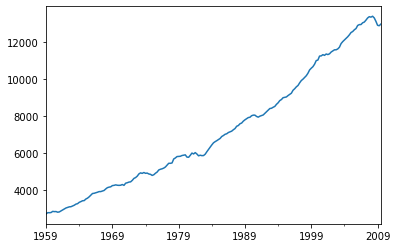

In [6]:
# plot readgdp
data["realgdp"].plot();

# Detrend time series

In [7]:
# Get the trend using statsmodels (Hodrick Prescott filter)
from statsmodels.tsa.filters.hp_filter import hpfilter

In [8]:
# Lambda value depends on frequency (1600 for quarterly data)
gdp_cycl, gdp_trend = hpfilter(data["realgdp"], lamb = 1600)
data["trend"] = gdp_trend
data["cycl"] = gdp_cycl
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend,cycl
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085,39.511915
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468,80.088532
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545,48.875455
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067,30.591933
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333,64.882667


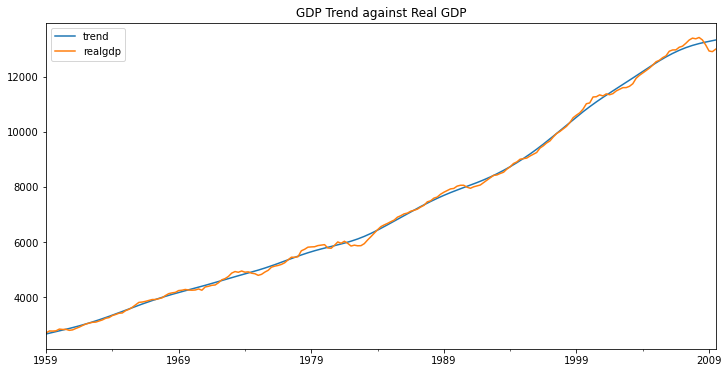

In [9]:
data[["trend","realgdp"]].plot(title = "GDP Trend against Real GDP", figsize = (12,6));

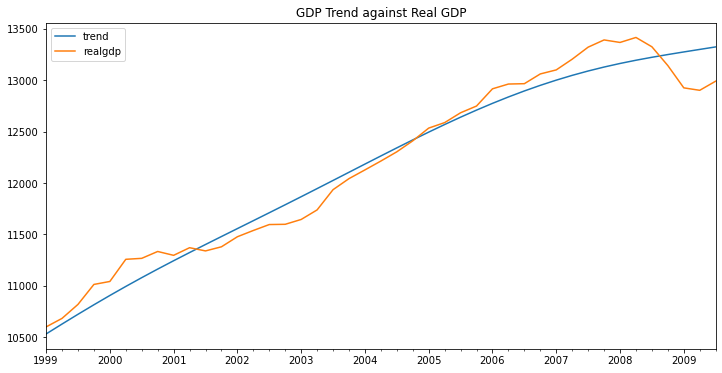

In [10]:
# Zoom in on recent years
data[["trend","realgdp"]]["1999-01-01":].plot(title = "GDP Trend against Real GDP", figsize = (12,6));

# Decomposition

Determines the components, error, trend and seasonality to build a general model. Additive model - apply when trend appears linear and seasonality seems constant over time. Multiplicative more appropriate with non-linear patterns in the data.

In [11]:
air = pd.read_csv("C:/Users/Imy Hull/datasets/airline_passengers.csv", index_col = "Month", parse_dates = True)
air.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
air.tail(1)

,Thousands of Passengers
Month,
1960-12-01,432


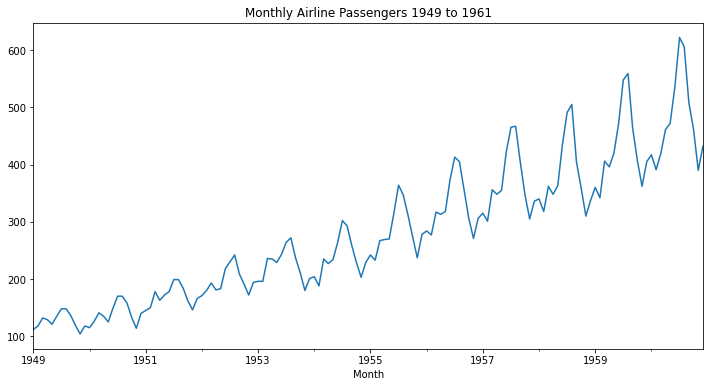

In [13]:
air["Thousands of Passengers"].plot(figsize = (12,6), title = "Monthly Airline Passengers 1949 to 1961");

In [14]:
air = air.dropna()

In [15]:
air.isnull().sum()

Thousands of Passengers    0
dtype: int64

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
results = seasonal_decompose(air["Thousands of Passengers"], model = "multiplicative")
results.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

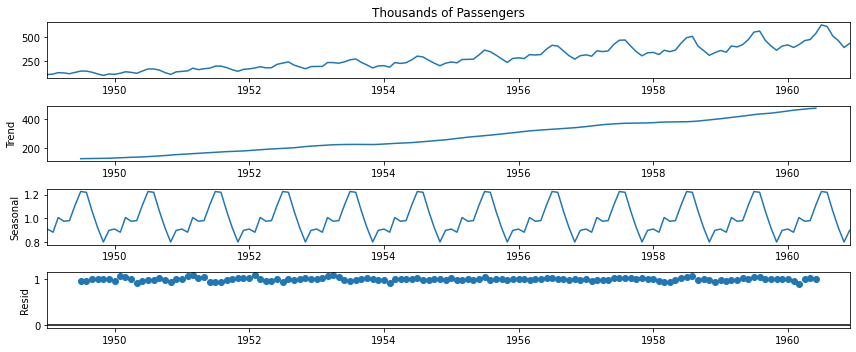

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)
results.plot();

# Simple Moving Average

Weight more recent data heavier than older data, compared to simple moving averages. Smaller windows in SMA lead to more noise. Also lags by the size of the window, so you never reach the full value of the data. Extreme historical values can also skew the data. EWMA is more sophisticated.

A smoothing parameter alpha is used. Doesn't account for trend or seasonality. Known as Simple Exponential Smoothing (SES)

In [19]:
air.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [20]:
air["SMA-6mnth"] = air["Thousands of Passengers"].rolling(window = 6).mean()
air["SMA-12mnth"] = air["Thousands of Passengers"].rolling(window = 12).mean()

In [21]:
air.head()

,Thousands of Passengers,SMA-6mnth,SMA-12mnth
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN


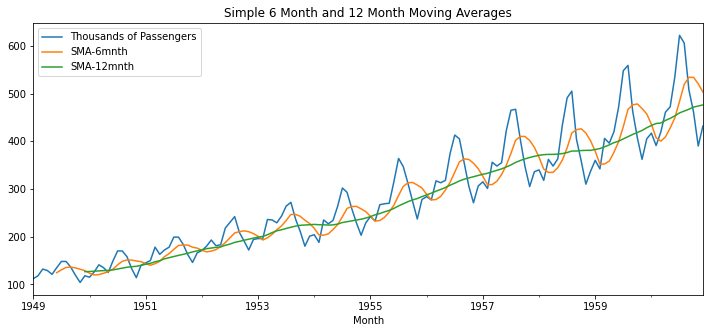

In [22]:
air.plot(title = "Simple 6 Month and 12 Month Moving Averages");

There are clear lags at the start of the data and the averages do not really match to the peaks in the data

# Exponential Weighted Moving Average (using Pandas)

Weights more recent data higher than older data.

The span, half-life or alpha value can be specified. Using span to determine the smoothing factor alpha, the value is set to alpha = 2/(span + 1)

Can specify alpha directly which is set between 0 and 1. A value nearer to 1 puts more weight on the recent values whereas a value nearer to 0 includes older data.

In [23]:
span = 12
air["EWMA-12"] = air["Thousands of Passengers"].ewm(span = 12,adjust = False).mean()

In [24]:
air.head()

,Thousands of Passengers,SMA-6mnth,SMA-12mnth,EWMA-12
Month,,,,
1949-01-01,112,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,112.923077
1949-03-01,132,NaN,NaN,115.857988
1949-04-01,129,NaN,NaN,117.879836
1949-05-01,121,NaN,NaN,118.359861


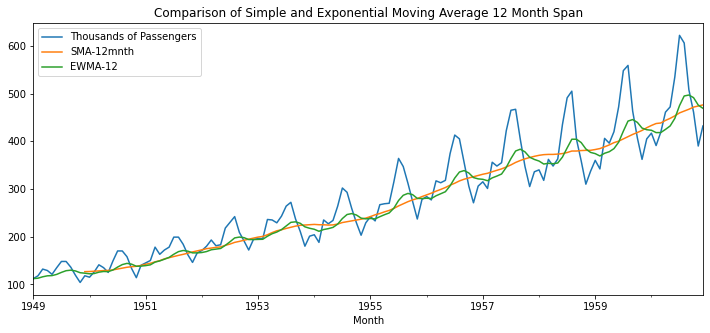

In [25]:
air[["Thousands of Passengers", "SMA-12mnth","EWMA-12"]].plot(title = "Comparison of Simple and Exponential Moving Average 12 Month Span");

The weighted moving average matches the data better especially during the later years but still doesn't really do very well

# Simple, Double and Triple Exponential Smoothing (Holt Winters Method)

Originally Holt double exponential smoothing then Winters accounts for seasonality. Each has a smoothing parameter, alpha, beta and gamma. Beta accounts for trend. Alpha accounts for level. Seasonal component (additive, multiplicative). Seasonal variations are constant or changing proportional to the level of the series. Gamma accounts for seasonal.

In [26]:
air.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [27]:
# Specify the index frequency to Monthly in this case (see offset aliases in statsmodels)
air.index.freq = "MS"

## Simple Exponential Smoothing Base Method

This does what the Exponential Weighted Moving Average does from the previous section. Uses just alpha as a smoothing factor for level.

In [28]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [29]:
model = SimpleExpSmoothing(air["Thousands of Passengers"])

In [30]:
span = 12
alpha = 2/(1+span)
alpha

0.15384615384615385

In [31]:
fitted_model = model.fit(smoothing_level = alpha, optimized = False)
air["SES_12"] = fitted_model.fittedvalues.shift(-1)

In [32]:
air.head()

,Thousands of Passengers,SMA-6mnth,SMA-12mnth,EWMA-12,SES_12
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,112.923077,112.923077
1949-03-01,132,NaN,NaN,115.857988,115.857988
1949-04-01,129,NaN,NaN,117.879836,117.879836
1949-05-01,121,NaN,NaN,118.359861,118.359861


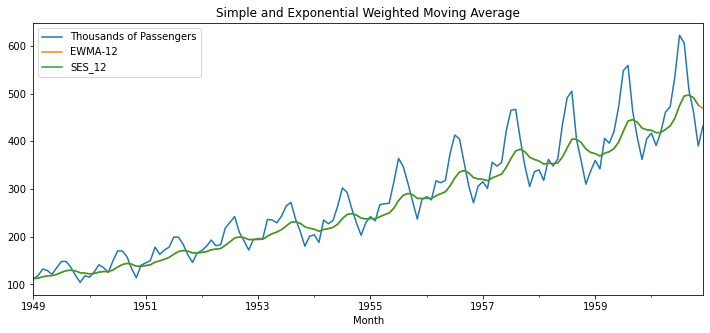

In [33]:
air[["Thousands of Passengers", "EWMA-12","SES_12"]].plot(title = "Simple and Exponential Weighted Moving Average");

## Double Exponential Smoothing (Holt Method)

Adds in a factor for trend on top of just the base level. Uses a parameter beta for trend

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Additive Trend Model

The "heuristic" method is not based on a particular statistical principle, but instead chooses initial values based on a "reasonable approach" that was found to often work well in practice (it is described in section 2.6.1 of Hyndman et al. (2008) "Forecasting with Exponential Smoothing").

The default is "estimated" method treats the initial values like parameters, and chooses them to minimize the sum of squared errors.

In [35]:
air["DESAdd_12"] = ExponentialSmoothing(air["Thousands of Passengers"], trend = 'add',initialization_method='estimated').fit().fittedvalues.shift(-1)

In [36]:
air.head()

,Thousands of Passengers,SMA-6mnth,SMA-12mnth,EWMA-12,SES_12,DESAdd_12
Month,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,114.102394
1949-02-01,118,NaN,NaN,112.923077,112.923077,120.040657
1949-03-01,132,NaN,NaN,115.857988,115.857988,134.001539
1949-04-01,129,NaN,NaN,117.879836,117.879836,131.085845
1949-05-01,121,NaN,NaN,118.359861,118.359861,123.110263


In [37]:
air.columns

Index(['Thousands of Passengers', 'SMA-6mnth', 'SMA-12mnth', 'EWMA-12',
       'SES_12', 'DESAdd_12'],
      dtype='object')

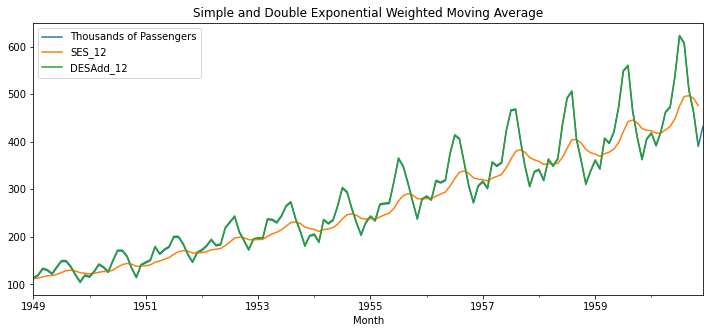

In [38]:
air[["Thousands of Passengers","SES_12","DESAdd_12"]].plot(title = "Simple and Double Exponential Weighted Moving Average");

The new model is picking up the movements in the data very well compared to the simple model

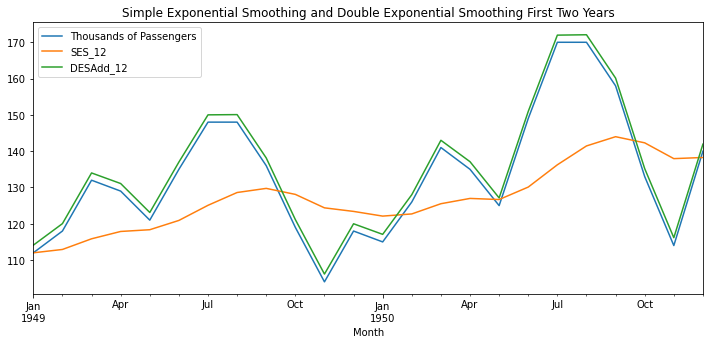

In [39]:
air[['Thousands of Passengers','SES_12', 'DESAdd_12']].iloc[:24].plot(title = "Simple Exponential Smoothing and Double Exponential Smoothing First Two Years");

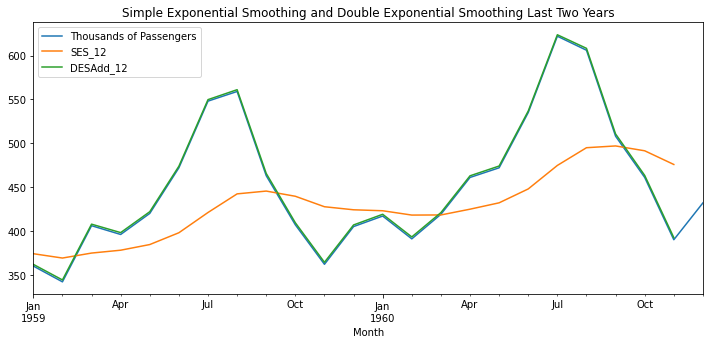

In [40]:
air[['Thousands of Passengers','SES_12', 'DESAdd_12']].iloc[-24:].plot(title = "Simple Exponential Smoothing and Double Exponential Smoothing Last Two Years");

### Multiplicative Trend Model

In [41]:
air["DESMul_12"] = ExponentialSmoothing(air["Thousands of Passengers"], trend = 'mul',initialization_method = 'estimated').fit().fittedvalues.shift(-1)

In [42]:
air.tail()

,Thousands of Passengers,SMA-6mnth,SMA-12mnth,EWMA-12,SES_12,DESAdd_12,DESMul_12
Month,,,,,,,
1960-08-01,606,519.166667,463.333333,494.898619,494.898619,608.168786,616.673652
1960-09-01,508,534.000000,467.083333,496.914216,496.914216,510.571382,517.378618
1960-10-01,461,534.000000,471.583333,491.388952,491.388952,463.313463,469.290950
1960-11-01,390,520.333333,473.916667,475.790652,475.790652,392.424879,397.168079
1960-12-01,432,503.166667,476.166667,469.053629,NaN,NaN,NaN


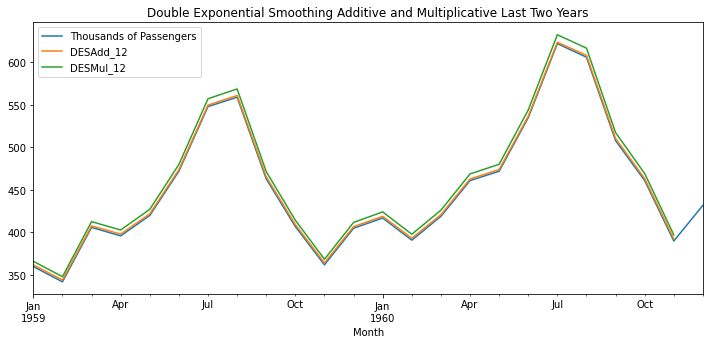

In [43]:
air[['Thousands of Passengers','DESAdd_12', 'DESMul_12']].iloc[-24:].plot(title = "Double Exponential Smoothing Additive and Multiplicative Last Two Years");

## Triple Exponential Smoothing

### Additive Trend and Additive Seasonality

In [44]:
air["TESAdd_12"] = ExponentialSmoothing(air["Thousands of Passengers"], trend = 'add', seasonal = 'add',seasonal_periods = 12).fit().fittedvalues

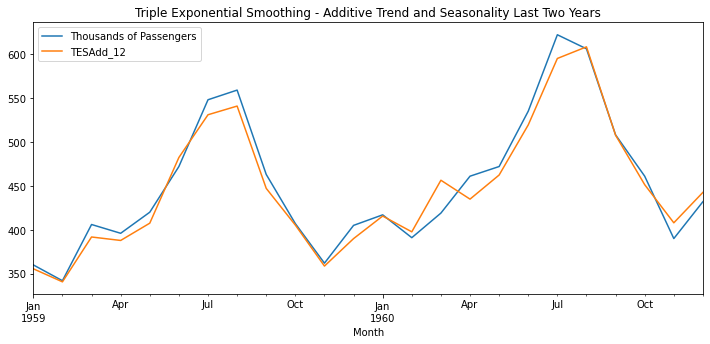

In [45]:
air[['Thousands of Passengers','TESAdd_12']].iloc[-24:].plot(title = "Triple Exponential Smoothing - Additive Trend and Seasonality Last Two Years");

### Additive Trend and Multiplicative Seasonality

In [46]:
air["TESAdd_12B"] = ExponentialSmoothing(air["Thousands of Passengers"], trend = 'add', seasonal = 'mul',seasonal_periods = 12).fit().fittedvalues

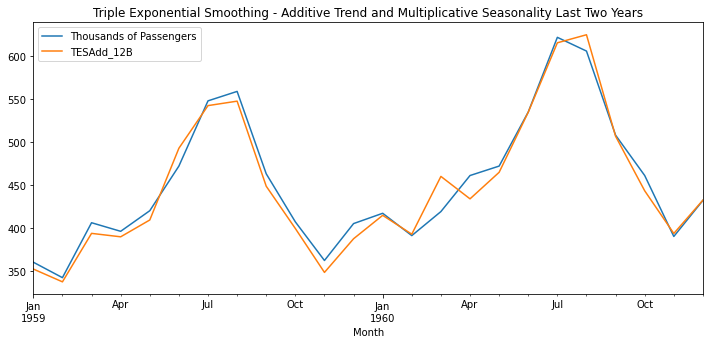

In [47]:
air[['Thousands of Passengers',"TESAdd_12B"]].iloc[-24:].plot(title = "Triple Exponential Smoothing - Additive Trend and Multiplicative Seasonality Last Two Years");

### Multiplicative Trend and Additive Seasonality

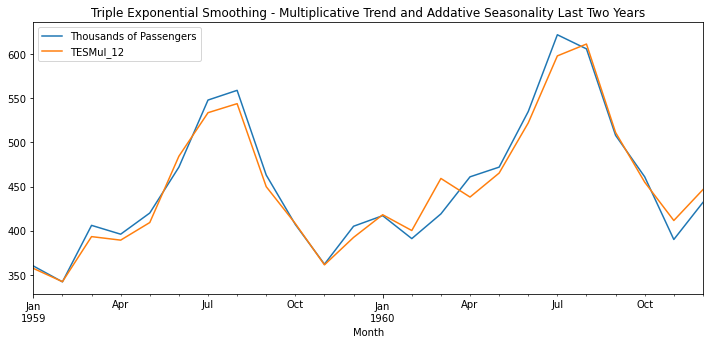

In [48]:
air["TESMul_12"] = ExponentialSmoothing(air["Thousands of Passengers"], trend = 'mul', seasonal = 'add',seasonal_periods = 12).fit().fittedvalues
air[['Thousands of Passengers',"TESMul_12"]].iloc[-24:].plot(title = "Triple Exponential Smoothing - Multiplicative Trend and Addative Seasonality Last Two Years");

### Multiplicative Trend and Multiplicative Seasonality

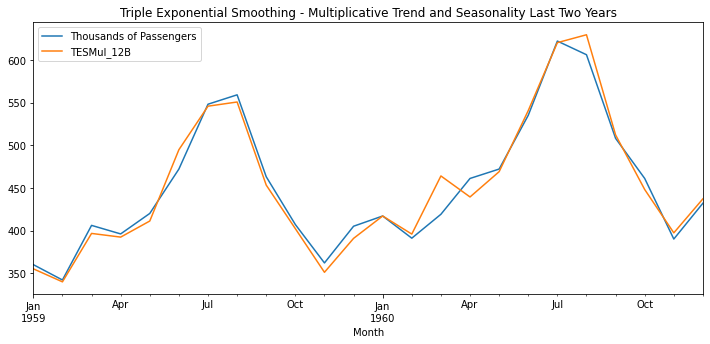

In [49]:
air["TESMul_12B"] = ExponentialSmoothing(air["Thousands of Passengers"], trend = 'mul', seasonal = 'mul',seasonal_periods = 12).fit().fittedvalues
air[['Thousands of Passengers',"TESMul_12B"]].iloc[-24:].plot(title = "Triple Exponential Smoothing - Multiplicative Trend and Seasonality Last Two Years");

In [50]:
air.columns

Index(['Thousands of Passengers', 'SMA-6mnth', 'SMA-12mnth', 'EWMA-12',
       'SES_12', 'DESAdd_12', 'DESMul_12', 'TESAdd_12', 'TESAdd_12B',
       'TESMul_12', 'TESMul_12B'],
      dtype='object')

### Plot all series together

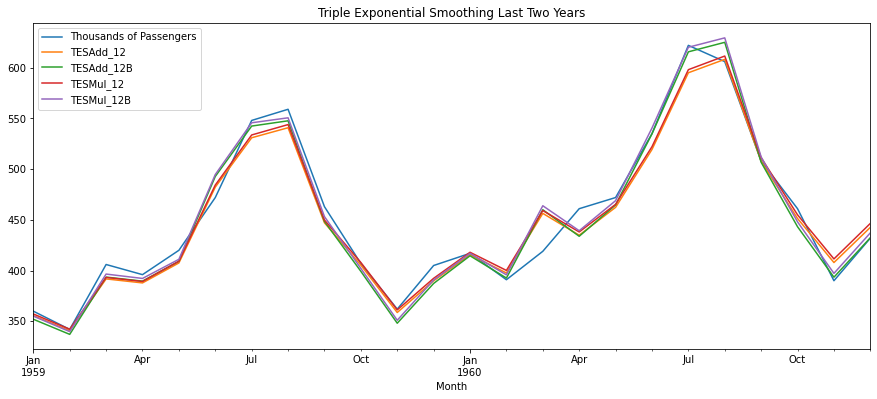

In [51]:
air[['Thousands of Passengers','TESAdd_12', 'TESAdd_12B',
       'TESMul_12', 'TESMul_12B']].iloc[-24:].plot(title = "Triple Exponential Smoothing Last Two Years", figsize = (15,6));

Multiplicative trend and seasonality or additive trend and multiplicative seasonality seem to be the best models

## Second Example - Energy Production Data

In [52]:
df = pd.read_csv("datasets/EnergyProduction.csv",index_col = 0, parse_dates = True)
df.shape

(240, 1)

In [53]:
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [54]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

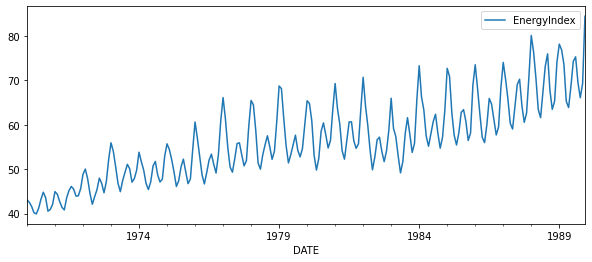

In [55]:
df.plot(figsize=(10,4)).autoscale(axis='x',tight=True);

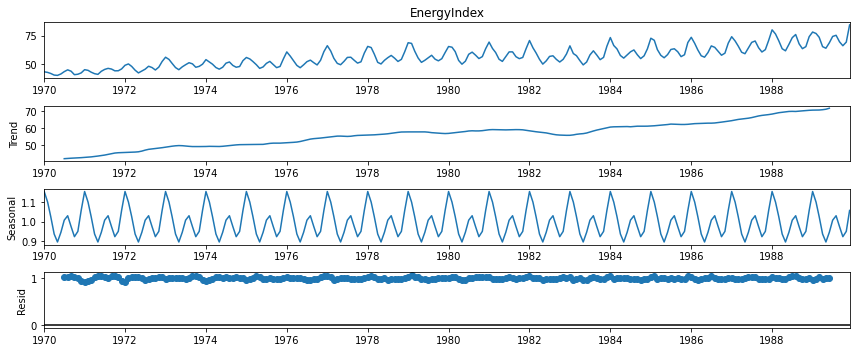

In [56]:
res = seasonal_decompose(df["EnergyIndex"], model = "multiplicative")
res.plot();

### Simple Moving Average

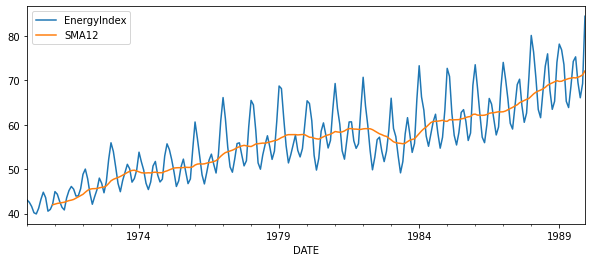

In [57]:
df['SMA12'] = df['EnergyIndex'].rolling(window=12).mean()
df.plot(figsize=(10,4)).autoscale(axis='x',tight=True);

### Exponential Weighted Moving Average (Span 12)

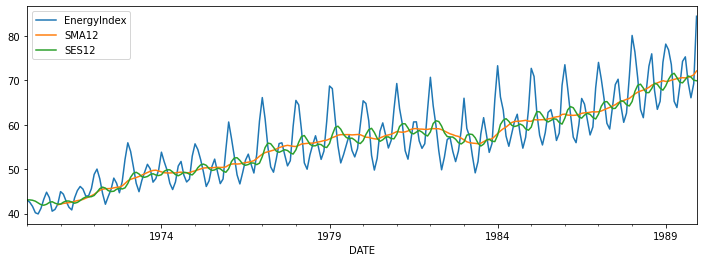

In [58]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df['SES12']=SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=2/(12+1),optimized=False).fittedvalues
df.plot(figsize=(12,4)).autoscale(axis='x',tight=True);

### Triple Exponential Smoothing (Holt Winters Model)

In [59]:
df.head()

,EnergyIndex,SMA12,SES12
DATE,,,
1970-01-01,43.0869,NaN,43.086900
1970-02-01,42.5577,NaN,43.086900
1970-03-01,41.6215,NaN,43.005485
1970-04-01,40.1982,NaN,42.792564
1970-05-01,39.9321,NaN,42.393431


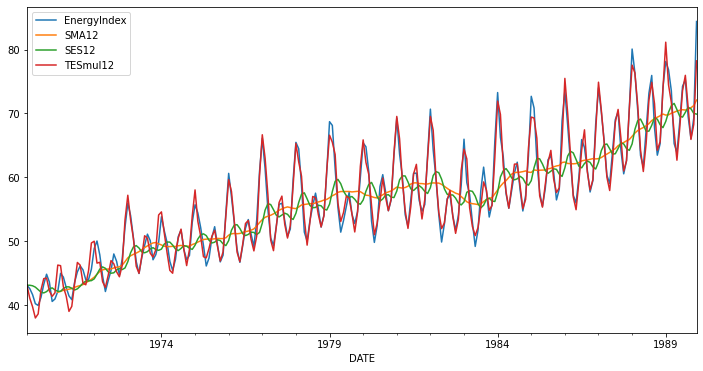

In [60]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['TESmul12'] = ExponentialSmoothing(df['EnergyIndex'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);

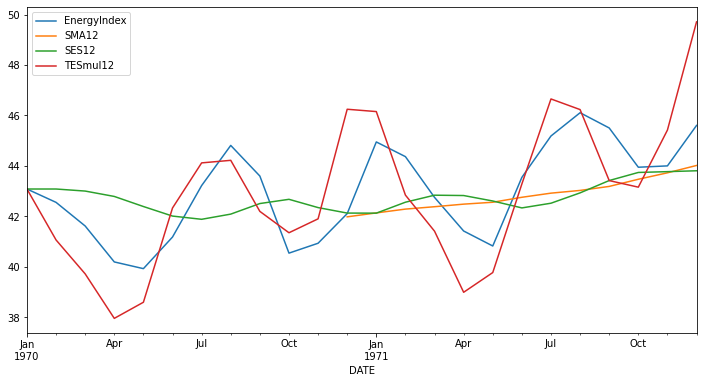

In [61]:
df.iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

# General Forecasting

In [62]:
air = pd.read_csv("C:/Users/Imy Hull/datasets/airline_passengers.csv", index_col = "Month", parse_dates = True)
air.dropna(inplace = True)
air.index.freq = 'MS'

In [63]:
air.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


* Split the data into training and test sets (test sets usually 20% of the sample)

* Test data should at least be as long as the forecast period/horizon

In [64]:
# Remember that up to 109 due to indexing does not include 109
train = air.iloc[:109]
test = air.iloc[108:]

## Triple Exponential Forecast

In [65]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [66]:
# Fit on the training data
fitted_model1 = ExponentialSmoothing(train["Thousands of Passengers"], trend = 'multiplicative', 
                                    seasonal = 'multiplicative',seasonal_periods = 12).fit()

In [67]:
# Forecast 3 years ahead
test_pred = fitted_model1.forecast(36)

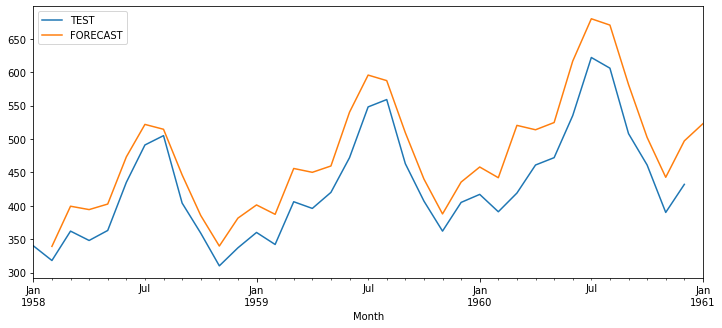

In [68]:
# Plot against actual test data
#train["Thousands of Passengers"].plot(legend = True,label = "TRAIN", figsize = (12,6),title = "Air Passengers Forecasts - HW Multiplicative")
test["Thousands of Passengers"].plot(legend = True, label = "TEST");
test_pred.plot(legend = True,label = "FORECAST",xlim = ["1958-01-01","1961-01-01"]);

## Evaluation Metrics

* Need metrics for continuous values along a timeseries.
* Mean absolute error - simple but not alerting if forecast is wrong for a few points.
* Mean squared error - squared. Larger errors are highlighted.However, the units are also squared not just residuals, hard to understand.
* Root mean squared error - root of MSE. Compare the value to the average values in the particular dataset.

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [70]:
print("Mean Absolute Error:",mean_absolute_error(test,test_pred))
print("Mean Squared Error:",mean_squared_error(test, test_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(test,test_pred)))
print("Mean:",test["Thousands of Passengers"].mean())
print("STD:", test["Thousands of Passengers"].std())

Mean Absolute Error: 63.031171575091825
Mean Squared Error: 5614.266734155986
Root Mean Squared Error: 74.92841072754705
Mean: 428.5
STD: 79.32915155045013


Not too far off on any one point. The RMSE is similar to the std deviation

### Try additive model

In [71]:
# Fit on the training data
fitted_model2 = ExponentialSmoothing(train["Thousands of Passengers"], trend = 'additive', 
                                    seasonal = 'additive',seasonal_periods = 12).fit()
test_pred2 = fitted_model2.forecast(36)

In [72]:
print("Mean Absolute Error:",mean_absolute_error(test,test_pred2))
print("Mean Squared Error:",mean_squared_error(test, test_pred2))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(test,test_pred2)))
print("Mean:",test["Thousands of Passengers"].mean())
print("STD:", test["Thousands of Passengers"].std())

Mean Absolute Error: 45.89258925932316
Mean Squared Error: 3083.034430189402
Root Mean Squared Error: 55.52507929025768
Mean: 428.5
STD: 79.32915155045013


The additive model has a lower RMSE than the multiplicative

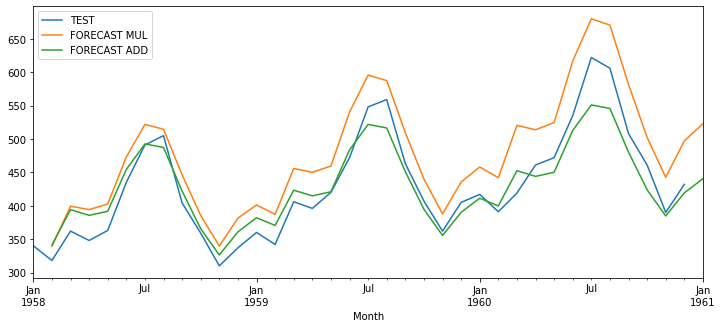

In [73]:
# Plot against actual test data
#train["Thousands of Passengers"].plot(legend = True,label = "TRAIN", figsize = (12,6),title = "Air Passengers Forecasts - Comparison")
test["Thousands of Passengers"].plot(legend = True, label = "TEST");
test_pred.plot(legend = True,label = "FORECAST MUL",xlim = ["1958-01-01","1961-01-01"])
test_pred2.plot(legend = True,label = "FORECAST ADD",xlim = ["1958-01-01","1961-01-01"]);

## Stationarity - visual inspection

* Series exhibits stationarity if it does not exhibit trends or seasonality
* Fluctuations are due to outside influences and noise
* Stationary data has constant mean and variance over time

In [74]:
stat = pd.read_csv("C:/Users/Imy Hull/datasets/samples.csv", index_col = 0,parse_dates = True)

In [75]:
stat.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


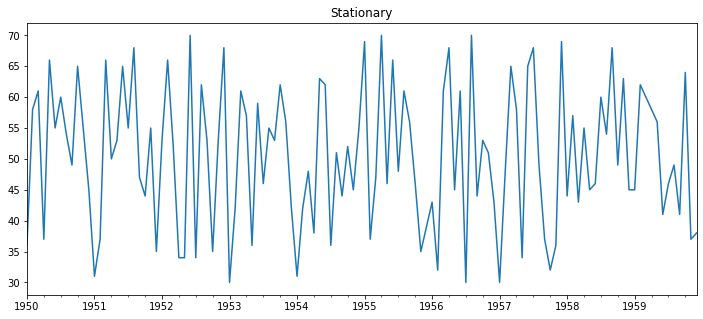

In [76]:
stat["a"].plot(title = "Stationary");

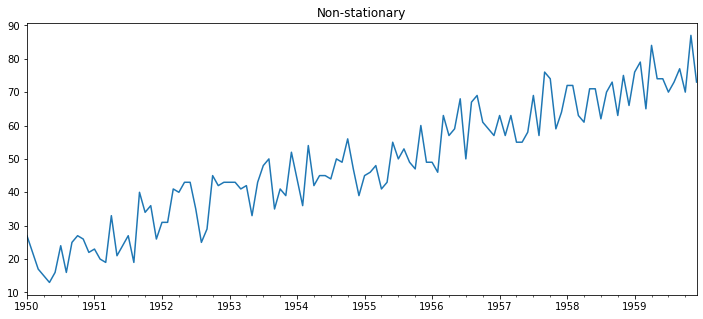

In [77]:
stat["b"].plot(title = "Non-stationary");

## Differencing

In [78]:
from statsmodels.tsa.statespace.tools import diff

In [79]:
# What differencing is:
first_order = stat["b"] - stat["b"].shift(1)
first_order.head()

1950-01-01    NaN
1950-02-01   -5.0
1950-03-01   -5.0
1950-04-01   -2.0
1950-05-01   -2.0
Name: b, dtype: float64

In [80]:
# Using the diff function (drops the first line which is NAN)
first_order = diff(stat["b"],k_diff = 1)
first_order.head()

1950-02-01   -5.0
1950-03-01   -5.0
1950-04-01   -2.0
1950-05-01   -2.0
1950-06-01    3.0
Name: b, dtype: float64

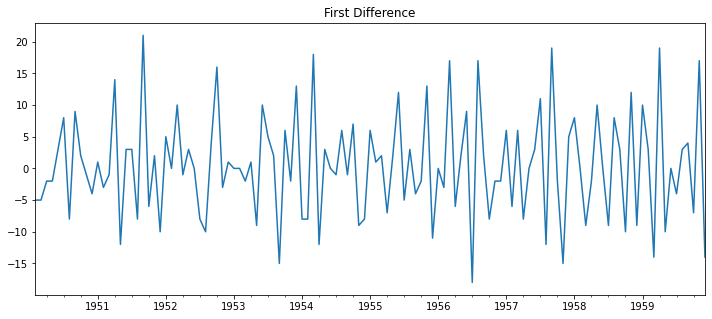

In [81]:
first_order.plot(title = "First Difference");

## Autocorrelation and Partial Autocorrelation Functions

* Autocorrelation shows correlation of the data with itself lagged or shifted by a specified number of time units
* Partial autocorrelation plots the residuals or errors against the data lagged. Previous days residuals versus the real values of that day. Expected to drop off quickly.

In [82]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [83]:
# Non-stationary data
air.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [84]:
# Stationary Data
births = pd.read_csv("C:/Users/Imy Hull/datasets/DailyTotalFemaleBirths.csv", index_col = 0,parse_dates = True)
births.index.freq = 'D'

In [85]:
births.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [86]:
from pandas.plotting import lag_plot

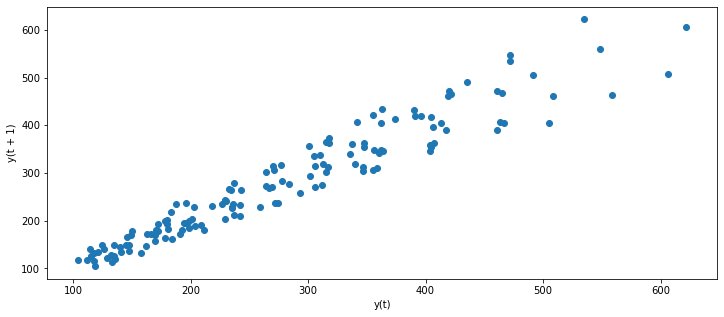

In [87]:
# airline data
lag_plot(air["Thousands of Passengers"]);

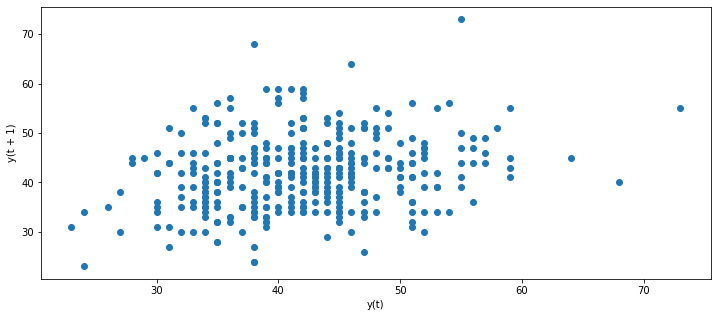

In [88]:
# Births data
lag_plot(births);

In [89]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

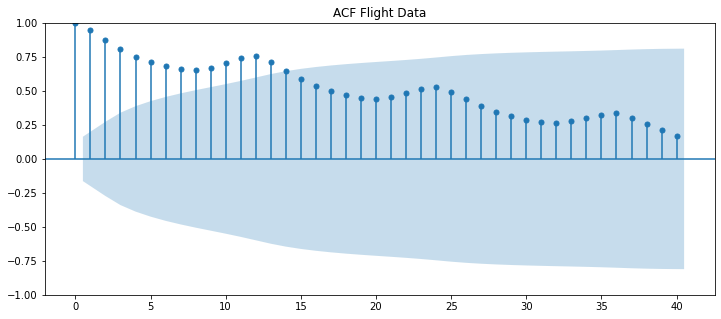

In [90]:
plot_acf(air["Thousands of Passengers"],lags = 40, title = "ACF Flight Data");

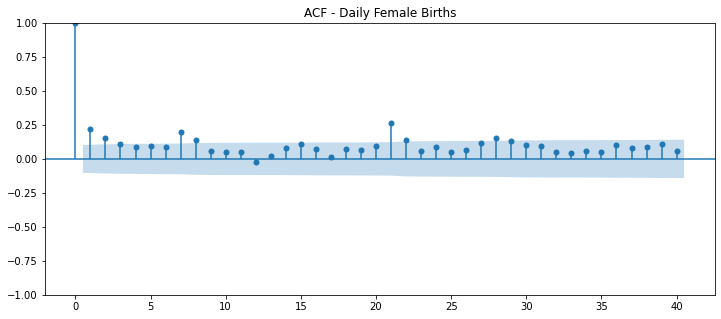

In [91]:
plot_acf(births, lags = 40, title = "ACF - Daily Female Births");

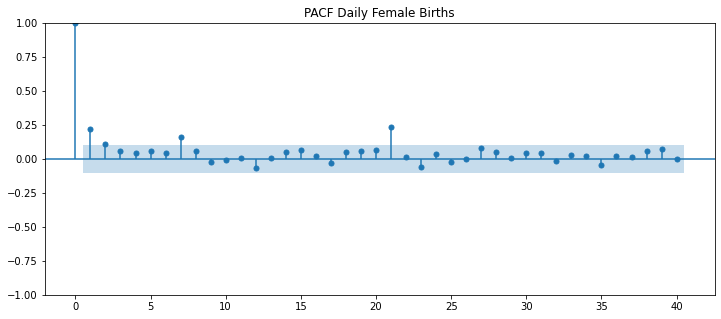

In [92]:
plot_pacf(births, lags = 40, title = "PACF Daily Female Births");

## Augmented Dickey-Fuller Test

* ARIMA and ARMA - autoregressive moving average models.
* ARIMA (p,d,q) - p: autoregression, d:integrated component or differencing, q: moving average (using residual error)
* Stationarity - constant mean and variance (no trend or seasonality)
* Can use Augmented Dickey-Fuller Test to determine stationarity
* Use differencing to get stationarity, keep going until achieved
* Choose p,d,q parameters using ACF and PACF plots but this can be difficult.
* Another method is to use grid search on various model combinations and compare on an evaluation metric

## Autoregressive Simple AR Model

* The autogregressive model - the output linearly depends on its own previous values and on a stochastic term (unpredicatable)
* Model consists of constant, phi values for lagged coefficients and white noise
* Simplest model - AR(1), which is one lagged step backwards and so on

In [93]:
from statsmodels.tsa.ar_model import AutoReg, ARResults, ar_select_order

In [94]:
# Set monthly start frequency
pop = pd.read_csv("C:/Users/Imy Hull/datasets/uspopulation.csv", index_col = 'DATE',parse_dates = True)
pop.index.freq = "MS"

In [95]:
pop.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


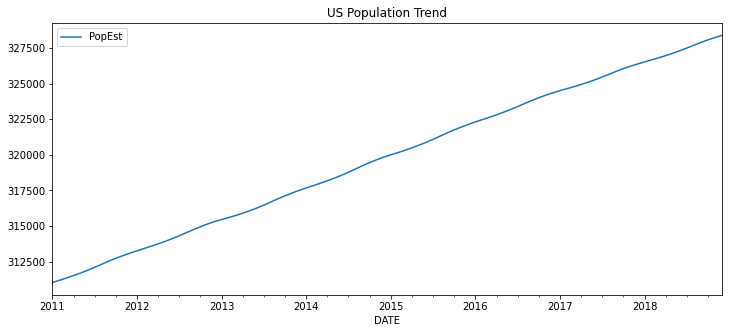

In [96]:
pop.plot(title = "US Population Trend");

In [97]:
pop.shape

(96, 1)

In [98]:
# Set one year as testing (12 months or 96 months less 84 months)
train = pop.iloc[:84]
test = pop.iloc[84:]

In [99]:
# Check lengths
print(train.shape, test.shape)

(84, 1) (12, 1)


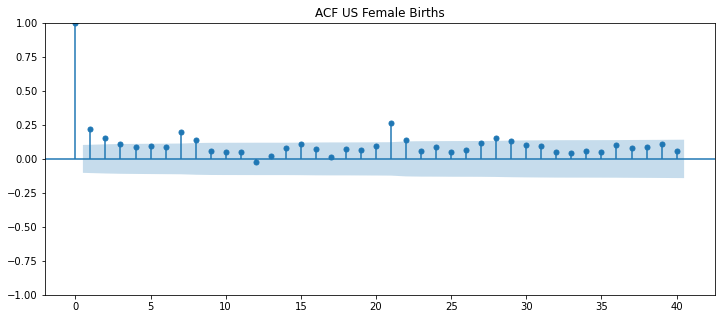

In [100]:
plot_acf(births,lags = 40, title = "ACF US Female Births");

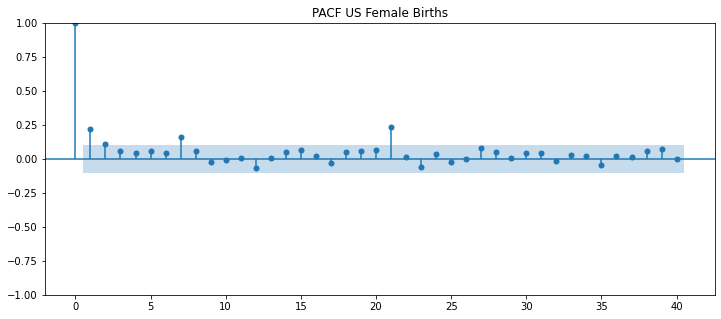

In [101]:
plot_pacf(births,lags = 40, title = "PACF US Female Births");

In [102]:
# Fit model on training data
model = AutoReg(train["PopEst"],lags = 1)
ar1_fit = model.fit()

In [103]:
# Get params
ar1_fit.params

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [104]:
# Set start and end
start = len(train)
end = len(train)+len(test)-1
print(start, end)

84 95


In [105]:
# Predict values given the start and end of the data
predict1 = pd.DataFrame(ar1_fit.predict(start = start, end = end))
predict1

,0
2018-01-01,326560.403377
2018-02-01,326742.749463
2018-03-01,326925.038278
2018-04-01,327107.269838
2018-05-01,327289.444162
2018-06-01,327471.561268
2018-07-01,327653.621173
2018-08-01,327835.623896
2018-09-01,328017.569455
2018-10-01,328199.457868


In [106]:
forecast = pd.concat([test,predict1],axis = 1)
forecast.columns = ["PopEst","Predict"]
forecast.head()

,PopEst,Predict
2018-01-01,326527,326560.403377
2018-02-01,326669,326742.749463
2018-03-01,326812,326925.038278
2018-04-01,326968,327107.269838
2018-05-01,327134,327289.444162


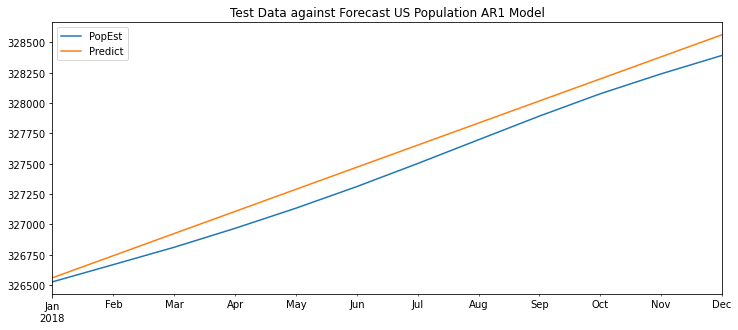

In [107]:
forecast.plot(title = "Test Data against Forecast US Population AR1 Model");

Trend is good but slightly overestimated

## Try AR2 model (2 lags)

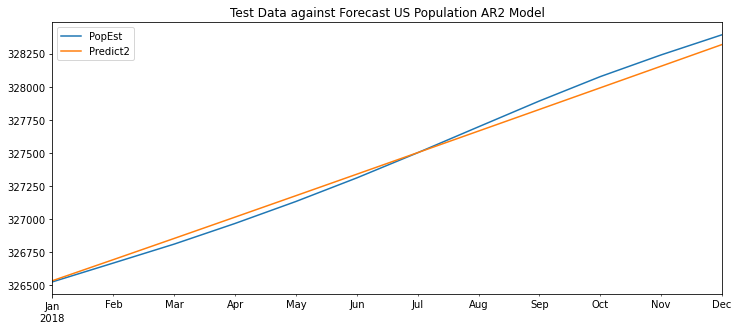

In [108]:
model = AutoReg(train["PopEst"], lags = 2)
ar2_fit = model.fit()
predict2 = pd.DataFrame(ar2_fit.predict(start = start, end = end))
forecast2 = pd.concat([test,predict2],axis = 1)
forecast2.columns = ["PopEst","Predict2"]
forecast2.plot(title = "Test Data against Forecast US Population AR2 Model");

In [109]:
ar2_fit.params

const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64

## Find the Best Order Value 

In [110]:
# select order (try 10 because there appears from the ACF to be a pattern every 8 to 9 months as we would expect)
model = ar_select_order(train["PopEst"], maxlag=10)
model.ar_lags

[1, 2, 3, 4, 5, 6, 7, 8]

Statsmodels shows AR(8) is the most accurate

In [111]:
model = AutoReg(train["PopEst"], lags = 8)
ar3_fit = model.fit()
ar3_fit.params

const        82.309677
PopEst.L1     2.437997
PopEst.L2    -2.302100
PopEst.L3     1.565427
PopEst.L4    -1.431211
PopEst.L5     1.125022
PopEst.L6    -0.919494
PopEst.L7     0.963694
PopEst.L8    -0.439511
dtype: float64

In [112]:
ar3_fit.aic

488.3530527004973

In [113]:
predict1 = ar1_fit.predict(start = start, end = end)
predict2 = ar2_fit.predict(start = start, end = end)
predict3 = ar3_fit.predict(start = start, end = end)

In [114]:
preds = [predict1, predict2, predict3]
labels = ["AR1","AR2","AR8"]

In [115]:
for i in range(3):
    error = mean_squared_error(test["PopEst"],preds[i])
    print(labels[i], error)

AR1 17449.714239577344
AR2 2713.258615609235
AR8 186.97058617508583


In [116]:
forecast = pd.concat([test["PopEst"],predict1,predict2,predict3],axis = 1)
forecast.columns = ["PopEst","AR1","AR2","AR8"]
forecast.head()

,PopEst,AR1,AR2,AR8
2018-01-01,326527,326560.403377,326535.672503,326523.865559
2018-02-01,326669,326742.749463,326694.718510,326662.772568
2018-03-01,326812,326925.038278,326854.882250,326805.746870
2018-04-01,326968,327107.269838,327015.944948,326960.064201
2018-05-01,327134,327289.444162,327177.719499,327130.572901


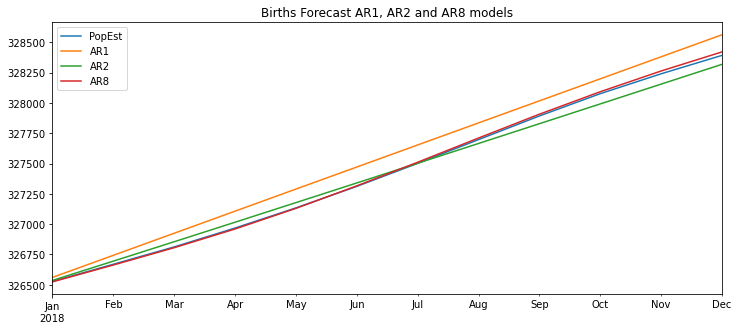

In [117]:
# Plot all three predictions
forecast.plot(title = "Births Forecast AR1, AR2 and AR8 models");

Unsurprisingly a lag of 8 gives the best forecast, so the births estimate 8 lags behind is the best predictor of births at the current time period.

## Forecasting Future Data

In [118]:
# Specify and fit the model on the whole dataset - don't specify maxlags. Forecast only as long as the original test set (12)
model = AutoReg(pop["PopEst"],lags = 8)
ar_fit = model.fit()
forecasted_values = pd.DataFrame(ar_fit.predict(start = len(pop), end = len(pop) + 12))
forecasted_values.columns = ["Forecast"]

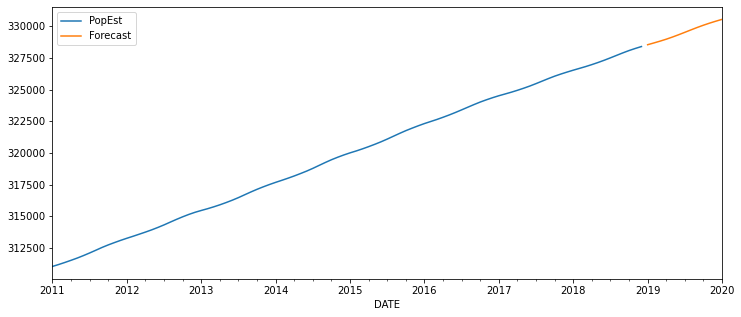

In [119]:
pop["PopEst"].plot(legend = True)
forecasted_values["Forecast"].plot(legend = True);

## Descriptive Statistics and Tests

* Statsmodels include a range of tests to determine stationarity and causality
* Augmented Dickey-Fuller Test: Null Hypothesis is non-stationary data, alternative hypothesis of stationary data if p<0.05
* Grainger causality test to determine if one time series is as useful as another. One time series has causality on changes in another time series. Even if it reports back there is strong causality but there could be another outside factor which is influencing things.
* MAE, MSE, RMSE - measure errors on forecast predictions on known test values
* AIC - information criterion. Evaluates a range of models to allow comparison. Estimates the quality of each model relative to the others. Penalties are used for the number of parameters used to prevent overfitting. Complex models are penalised and simpler models with slightly less performance are preferred.
* BIC - Bayesian Information Criterion is similar.
* Seasonality plots useful to find patterns per season.

## Augmented Dickey-Fuller test for Stationarity

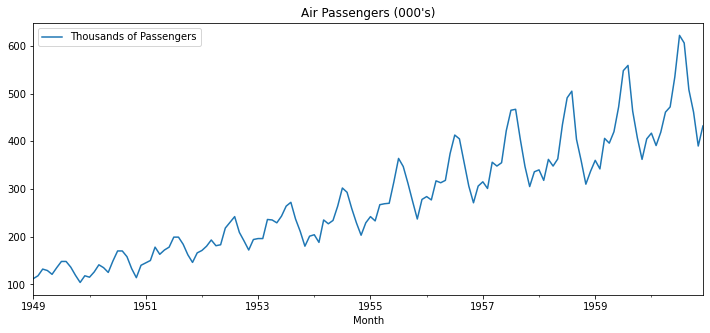

In [120]:
air.plot(title = "Air Passengers (000's)");

In [121]:
# Augmented Dickey-Fuller test for non-stationarity
from statsmodels.tsa.stattools import adfuller
adfuller(air["Thousands of Passengers"])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [122]:
#help(adfuller)

In [123]:
# Construct a formula to print it out neatly

def adf_test (df):
    dftest = adfuller(df)
    df_out = pd.Series(dftest[0:4], index = ["ADF Test Statistic", "P-Value", "Number of Lags","Number of Observations"])
    for key,value in dftest[4].items():
        df_out[f'critical value({key})'] = value
        
    if df_out[1]<0.05:
        print("Reject the Null Hypothesis, the data has no unit root and is stationary")
    else:
        print("Fail to reject the Null Hypothesis, the data has a unit root and is non-stationary")
    return df_out


In [124]:
adf_test(air["Thousands of Passengers"])

Fail to reject the Null Hypothesis, the data has a unit root and is non-stationary


ADF Test Statistic          0.815369
P-Value                     0.991880
Number of Lags             13.000000
Number of Observations    130.000000
critical value(1%)         -3.481682
critical value(5%)         -2.884042
critical value(10%)        -2.578770
dtype: float64

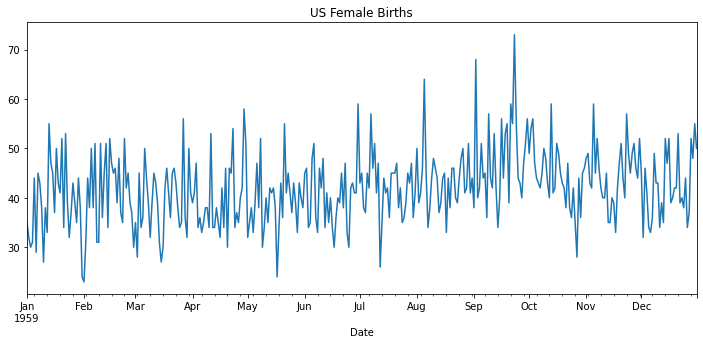

In [125]:
births["Births"].plot(title = "US Female Births");

In [126]:
adf_test(births["Births"])

Reject the Null Hypothesis, the data has no unit root and is stationary


ADF Test Statistic         -4.808291
P-Value                     0.000052
Number of Lags              6.000000
Number of Observations    358.000000
critical value(1%)         -3.448749
critical value(5%)         -2.869647
critical value(10%)        -2.571089
dtype: float64

## Granger Causality Test

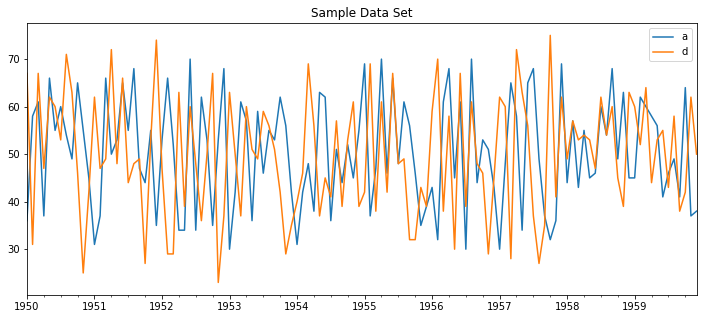

In [127]:
stat[["a","d"]].plot(title = "Sample Data Set");

In [128]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(stat[["a","d"]], maxlag = 3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


At lags 2 and 3, the p-value is zero indicating some causality between the datasets

## Using statsmodels evaluation metrics rather than sklearn (MSE, RMSE, MASE)

In [129]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [130]:
print(rmse(stat["a"],stat["b"]))
print(mse(stat["a"], stat["b"]))
print(meanabs(stat["a"], stat["b"]))

21.588963229699875
466.0833333333333
17.366666666666667


## Seasonality Plots

In [131]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

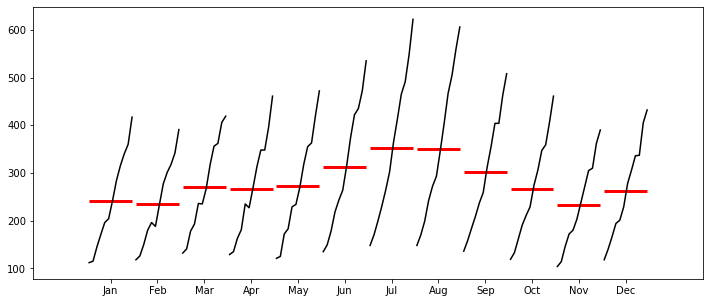

In [132]:
month_plot(air["Thousands of Passengers"]);

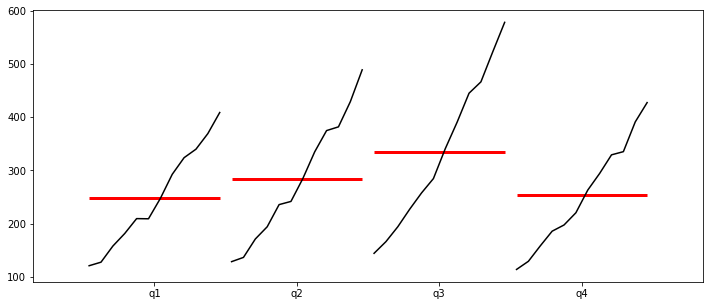

In [133]:
# Resample by quarter before plotting
dfq = air["Thousands of Passengers"].resample(rule = "Q").mean()
quarter_plot(dfq);